# Ondas y Señales
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Redes</code></p>

## Reconociendo el entorno de Jupyter Notebook
Jupyter Notebook es una aplicación web de código abierto que facilita la computación interactiva y colaborativa en docenas de lenguajes de programación, incluidos Python, R y julia; tres lenguajes muy populares entre los científicos de datos en la actualidad.

### Agenda
1. Ondas
1. Ondas portadoras
1. Señales análogas
1. Señales digitales
1. Ancho de banda 

In [69]:
# Importar módulos al cuaderno
import wave
import pyaudio
import numpy as np
import matplotlib.pyplot as plt

# Importar elementos de un módulo al cuaderno
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FixedLocator
from datetime import timedelta
from math import pi, floor
from numpy import sin

## 1. Ondas
---
Una [onda][1] representa la propagación de una perturbación de alguna propiedad física del espacio

[1]:https://es.wikipedia.org/wiki/Onda

### 1.1. Descripción matemática
Toda onda periódica puede ser descrita matemáticamente por la ecuación diferencial

$$ \frac{\partial ^2 f(x,t)}{\partial x^2}=\frac{1}{v^2} \frac{\partial ^2 f(x,t)}{\partial t^2} $$

Cuya solución son las funciones de la forma

$$ f(x,t) = A(x,t) \cdot sin( \omega t - kx + \theta) $$

donde:

* $ k = \dfrac{w}{v_f} $ <code> es el numero de onda</code>.
* $ \omega = 2 \pi f =\dfrac{2 \pi v_f}{\lambda}$ <code >es la frecuencia angular</code>.
* $ f =\dfrac{v_f}{\lambda} $ <code >es la frecuencia temporal</code>.
* $ \theta $ <code >es la fase</code>.

-------------------------------------------------------
 Frecuencia de la portadora:                2.5 Khz
 Periodo de la portadora:                   0.4 ms
 Fase de la portadora:                     -6.3 rad
 Frecuencia angular de la portadora:   15,708.0 rad/s
 Longitud de onda de la portadora:          0.1 mts
-------------------------------------------------------


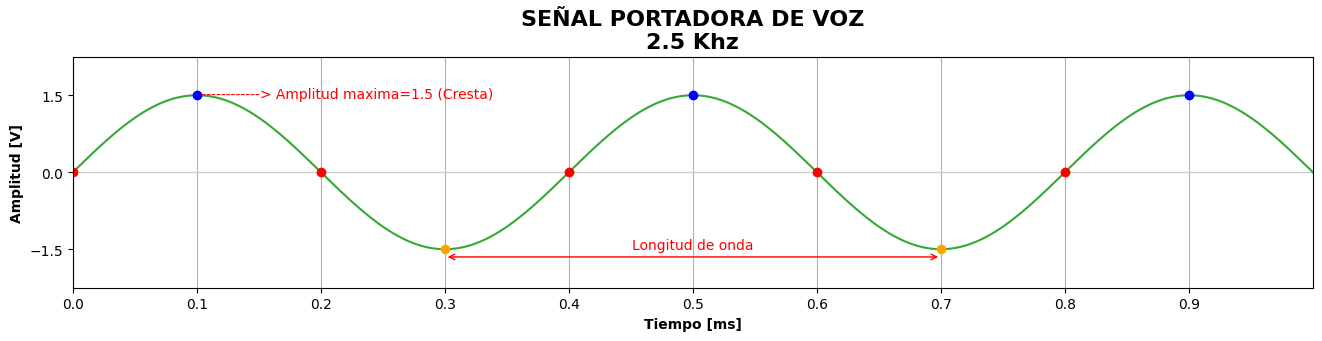

In [70]:
# Caracterización de una onda (Voz)
# ---------------------------------------------------------
f = 2_500           # Frecuencia de la onda voz (3400)
A = 1.5             # Amplitud de la onda (40 dB)
θ = -8*pi/4          # Fase de la onda (2*π > θ > -2*π)
vf = 343.2          # Velocidad del sonido (propagación)
# ---------------------------------------------------------
w = 2 * pi * f      # Frecuencia angular de la onda
T = 1/f             # Periodo de la onda
λ = vf/f            # Longitud de onda de la portadora
# ---------------------------------------------------------
nλ = 2.5            # Número de longitudes de onda visibles
λ4 = int(4*nλ)      # Número de cuartos de longitudes de onda visibles (Entero>8)
to = -θ/w           # Tiempo inicio


# Puntos críticos de la función de onda
# ---------------------------------------------------------
nodo = to
cresta = to+T/4
valle = to+3*T/4
if θ > 0:
    while nodo < T/100:
        nodo = nodo + T/2

    while cresta < T/100:
        cresta = cresta + T

    while valle < T/100:
        valle = valle + T

if θ < 0:
    while nodo > -T/100:
        nodo = nodo - T/2

    while cresta > -T/100:
        cresta = cresta - T

    while valle > -T/100:
        valle = valle - T

    nodo = nodo + T/2
    cresta = cresta + T
    valle = valle + T
# ---------------------------------------------------------
num_nodos = floor(λ4/2)
num_crestas = floor(λ4/4+1)
num_valles = floor(λ4/4+1)
críticos = np.linspace(min(nodo, cresta, valle), nλ/f+to, λ4+1, endpoint=True)
nodos = np.linspace(nodo, nodo+(T/2) * (num_nodos-1), num_nodos, endpoint=True)
crestas = np.linspace(
    cresta, cresta + T*(num_crestas-1), num_crestas, endpoint=True)
valles = np.linspace(
    valle, valle + T*(num_valles-1), num_valles, endpoint=True)


# Salida estándar
# ---------------------------------------------------------
print(55*"-")
print(f" Frecuencia de la portadora:            {f/1_000:7.1f} Khz")
print(f" Periodo de la portadora:               {1000*T:7.1f} ms")
print(f" Fase de la portadora:                  {θ:7.1f} rad")
print(f" Frecuencia angular de la portadora:   {round(w):,.1f} rad/s")
print(f" Longitud de onda de la portadora:      {λ:7.1f} mts")
print(55*"-")


'''# Máximos y nodos de la onda
nodos = np.array([críticos[i] for i in range(len(críticos)) if i % 2 == 0])
máximos = np.array([críticos[i] for i in range(len(críticos)) if i % 2 != 0])
# crestas y valles de la onda
crestas = np.array([máximos[i] for i in range(len(máximos)) if i % 2 == 0])
valles = np.array([máximos[i] for i in range(len(máximos)) if i % 2 != 0]) '''
# ---------------------------------------------------------


# Gráfica
# ----------------------------------------------------
# Un solo eje una sola gráfica - Señal portadora de voz
plt.figure(figsize=(16, 3))
# Vector de tiempo acorde a la frecuencia de la señal
t = np.linspace(0, nλ/f, 512, endpoint=True)
# Onda
y = A * sin(w*t + θ)
# linea horizontal
plt.axhline(y=0, linewidth=1.0, color="#ccc")
# plt.axhline(y=-A*1.1, xmin=3/8, xmax=7/8, linewidth=1.0, color="#f00")

# Transformando t a ms
# ----------------------------------------------------
t *= 1_000
nodos *= 1_000
crestas *= 1_000
valles *= 1_000


# Marcas de los puntos críticos
# ----------------------------------------------------
plt.plot(t, y, color="#33aa33")


# Marcas de los puntos críticos
# ----------------------------------------------------
plt.plot(
    nodos, np.zeros(len(nodos)), color='red',
    marker='o', linestyle='None')
plt.plot(
    crestas, A*np.ones(len(crestas)),
    color='blue', marker='o', linestyle='None')
plt.plot(
    valles, -A*np.ones(len(valles)),
    color='orange', marker='o', linestyle='None')


# Limites y garrapatas
# ----------------------------------------------------
plt.xlim(t.min(), t.max())
plt.ylim(y.min()*1.5, y.max()*1.5)
plt.yticks([y.min(), 0, y.max()])
plt.xticks(np.arange(t.min(), t.max(), step=0.1))
plt.grid(axis="x", which="both")

# Textos en la gráfica
# ----------------------------------------------------
plt.title(
    "Señal portadora de voz\n".upper()
    + f"{f/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [ms]", fontweight="bold")
plt.ylabel("Amplitud [V]", fontweight="bold")
plt.text(
    crestas[0], y.max()*0.96,
    f" ------------> Amplitud maxima={A} (Cresta)", color="#ff0000")

plt.annotate(
    "", xy=(valles[0], -A*1.1), xytext=(valles[1], -A*1.1),
    arrowprops=dict(arrowstyle="<->", color="#f00"))

plt.text(
    (valles[1]+valles[0])/2, -A, f"Longitud de onda",
    horizontalalignment='center', color="#ff0000")

plt.show()

## 2. Ondas portadoras
---
Una [onda portadora][2] o carrier es una onda de alta frecuencia, generalmente senoidal, a la que se le modifica alguno de sus parámetros (amplitud, frecuencia o fase) mediante una señal de baja frecuencia denominada moduladora (información) con el fin de transmitir una información.

[2]:https://es.wikipedia.org/wiki/Onda_portadora


----------------------------------------------
 Frecuencia de la portadora:         740.0 Khz
 Longitud de onda de la portadora:   405.1 mts
----------------------------------------------


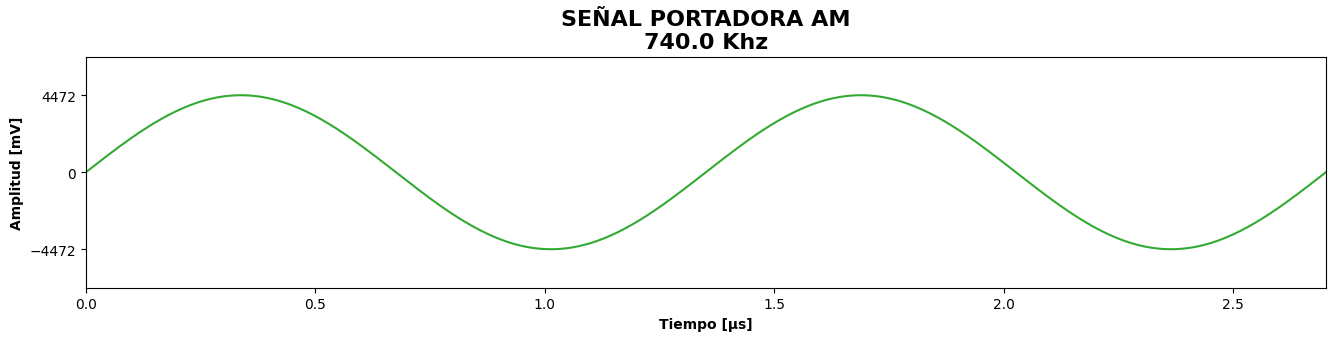

In [71]:
# [iPython] - Gráficas - Caracterización de una señal de AM
# ---------------------------------------------------------
# Ecos de pasto 740 Khz - AM - Onda media
fp = 740_000            # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Velocidad de la luz (propagación ondas electromagnéticas)
c = 299_792_458
# Potencia de un transmisor de 1 KW y antena de (50 Ω) - 100Km
Potencia = 1_000
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
λp = c/fp                # Longitud de onda de la portadora
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 2                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
print(f"----------------------------------------------")
print(f" Frecuencia de la portadora:       {fp/1_000:7.1f} Khz")
print(f" Longitud de onda de la portadora: {λp:7.1f} mts")
print(f"----------------------------------------------")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de AM
# ----------------------------------------------------
plt.figure(figsize=(16, 3))
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV
plt.plot(t, Sp, color="#33aa33")
# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title("Señal portadora AM\n".upper() +
          f"{fp/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

----------------------------------------------
 Frecuencia de la portadora:         101.1 Mhz
 Longitud de onda de la portadora:     3.0 mts
----------------------------------------------


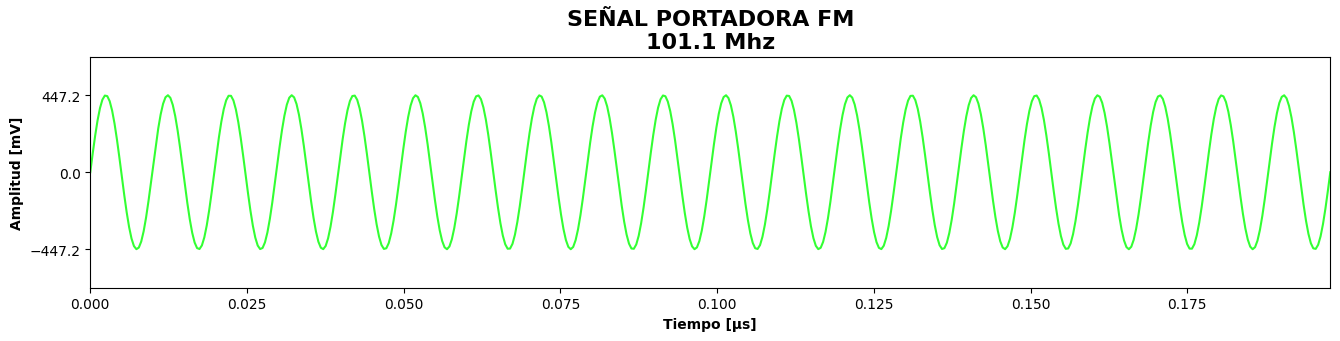

In [72]:
# [iPython] - Gráficas - Caracterización de una señal de FM
# ---------------------------------------------------------
# Emisora Universidad de Nariño 101.1 Mhz - FM
fp = 101_100_000        # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Potencia de un transmisor de 10 W y antena de (50 Ω - 10Km)
Potencia = 10
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 20                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
print(f"----------------------------------------------")
print(f" Frecuencia de la portadora:       {fp/1_000_000:7.1f} Mhz")
print(f" Longitud de onda de la portadora: {299_792_458/fp:7.1f} mts")
print(f"----------------------------------------------")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de FM
# ----------------------------------------------------
plt.figure(figsize=(16, 3))
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV
plt.plot(t, Sp, color="#33FF33")

# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title("Señal portadora FM\n".upper() +
          f"{fp/1_000_000:.1f} Mhz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

## 3. Señales análogas
---
Una [señal analógica][3] es una señal continua y aleatoria generada por algún tipo de fenómeno electromagnético; variable (amplitud o periodo) en el tiempo.

[3]:https://es.wikipedia.org/wiki/Se%C3%B1al_anal%C3%B3gica

In [73]:
file = "../resources/audios/ter-frase.wav"
audio_file = wave.open(file, 'rb')

# Características de la señal
# ---------------------------------------------------------
canales_de_audio = audio_file.getnchannels()
frecuencia_de_muestreo = audio_file.getframerate()
bit_por_muestra = 8*audio_file.getsampwidth()
valor_máximo = (2 ** bit_por_muestra)/2
num_muestras = audio_file.getnframes()
tiempo = num_muestras/frecuencia_de_muestreo
duración = timedelta(seconds=round(tiempo))

# Intensidad del sonido como una señal en el dominio del tiempo
# ---------------------------------------------------------
señal = audio_file.readframes(-1)
y = np.frombuffer(señal, dtype=np.int16)/valor_máximo
t = np.linspace(0, tiempo, num_muestras)

# Transformada de la señal al dominio de la frecuencia
# ---------------------------------------------------------
k = np.arange(num_muestras)         # Un rango como un array
frecuencia = k/tiempo               # Vector de frecuencias
Y = np.fft.fft(y)                   # Transformada rápida de Fourier
Y = np.real(Y)/np.real(Y).max()     # Normalización

# Intensidad del sonido como una señal en el dominio de la frecuencia
# ---------------------------------------------------------
f = frecuencia[range(int(num_muestras/2))]
Y = Y[range(int(num_muestras/2))]

# Salida estándar
# ---------------------------------------------------------
print(43*"-")
print(f" Canales de Audio:              {canales_de_audio:11.0f}")
print(f" Muestras:                      {num_muestras:11,.0f} ")
print(
    f" Frecuencia de muestreo:        {frecuencia_de_muestreo/1_000:11.1f} Khz")
print(f" Bits por muestra:              {bit_por_muestra:11,.0f} Bits")
print(f" Duración [hh:mm:ss:]:          {str(duración):>11}")
print(43*"-")

-------------------------------------------
 Canales de Audio:                        1
 Muestras:                          213,150 
 Frecuencia de muestreo:                7.3 Khz
 Bits por muestra:                       16 Bits
 Duración [hh:mm:ss:]:              0:00:29
-------------------------------------------


In [74]:
import IPython

IPython.display.display(IPython.display.Audio(file))

In [75]:
import winsound
winsound.PlaySound(file, winsound.SND_FILENAME)

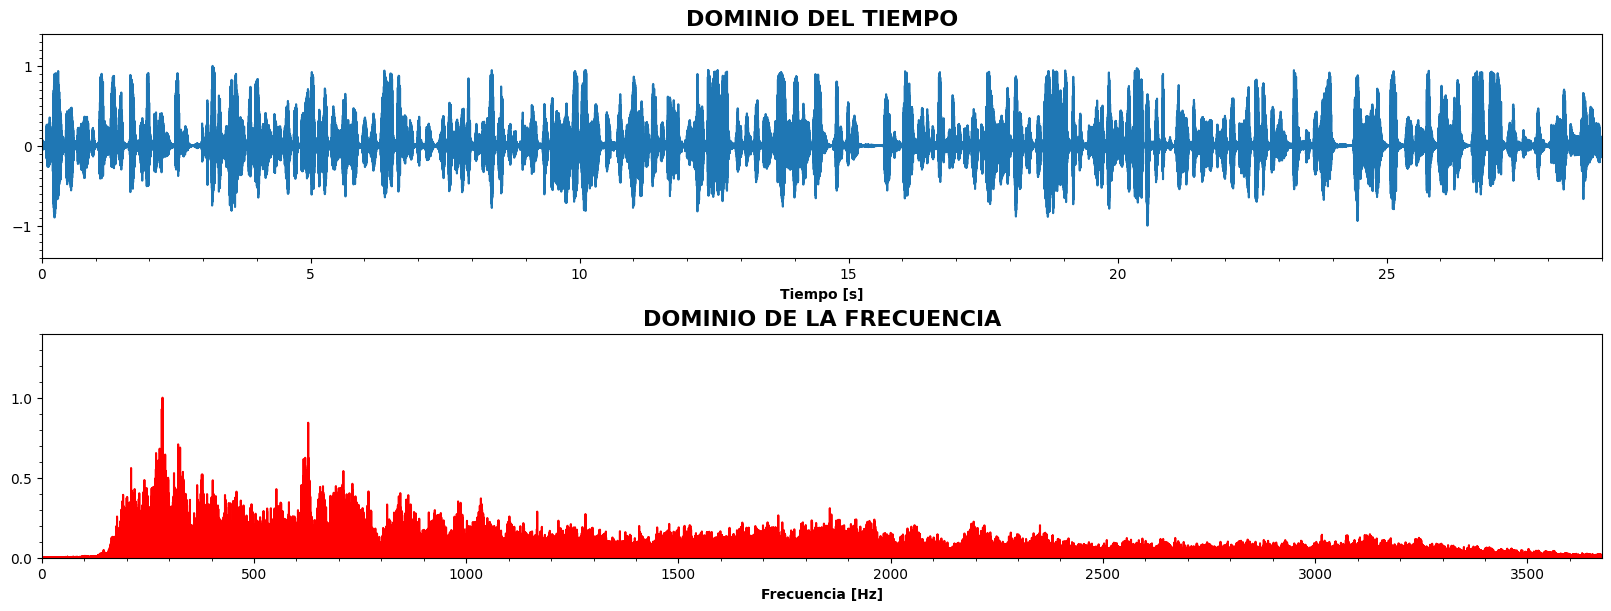

In [76]:
# Gráfica
# Representación de una señal de voz
# Dos gráficas - Dominio del tiempo y dominio de la frecuencia
# ----------------------------------------------------
fig = plt.figure(layout="constrained", figsize=(16, 6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(t, y)
ax2.plot(f, Y, 'r')

# Garrapatas
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(MultipleLocator(1))

ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
ax2.xaxis.set_major_locator(MultipleLocator(500))
ax2.xaxis.set_minor_locator(MultipleLocator(100))

# Limites
ax1.set_ylim([-1.4, 1.4])
ax1.set_xlim([0, t.max()])
ax2.set_ylim([0, 1.4])
ax2.set_xlim([0, f.max()])

# Textos en la gráfica
ax1.set_title("Dominio del tiempo".upper(), fontsize=16, fontweight="bold")
ax1.set_xlabel("Tiempo [s]", fontweight="bold")
ax2.set_title(
    "Dominio de la frecuencia".upper(), fontsize=16, fontweight="bold")
ax2.set_xlabel("Frecuencia [Hz]", fontweight="bold")

plt.show()

## 4. Señales digitales
---
Una [señal Digital][4] es un tipo de señal discreta y aleatoria en la que cada signo codifica la información.

[4]:https://es.wikipedia.org/wiki/Se%C3%B1al_digital

### 4.1. Conversión analógica-digital
La [conversión analógico-digital][41_1] consiste en la transcripción de señales analógicas en señal digital, con el propósito de facilitar su procesamiento.

[41_1]:https://es.wikipedia.org/wiki/Conversi%C3%B3n_anal%C3%B3gica-digital

### 4.1.1. Proceso
En una digitalización de la señal intervienen los siguientes procesos:

* Muestreo
* Retención
* Cuantificación
* Codificación

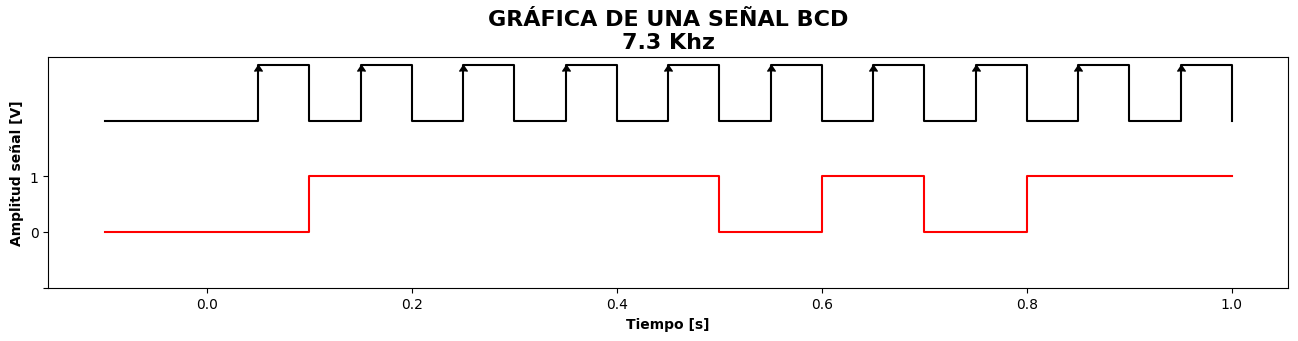

In [103]:
# Características
flanco_de_subida = True

# Muestreo
# ----------------------------------------------------
num_muestras = 1
muestra_inicial = 100
resolución = 10
máximo = 2**resolución

# Cuantizar
# ----------------------------------------------------
cuantizar = np.round(
    máximo*y[muestra_inicial:muestra_inicial+num_muestras]+máximo/2)

# Codificar BCD
# ----------------------------------------------------
stream = ""
clock = ""
for item in cuantizar:
    stream += str(bin(int(item)))[2:].zfill(resolución)
    clock += resolución*"32"

x = list("0" + stream + stream[-1])
c = list("222" + clock ) if flanco_de_subida  else list("22" + clock + "2")

# Vectores de tiempo
# ----------------------------------------------------
tx = np.linspace(0, num_muestras, len(stream) + 1, endpoint=True)
tc = np.linspace(0, num_muestras, len(clock) + 1, endpoint=True)
tp = [tc[i] for i in range(len(tc)) if i % 2 != 0]

pre_x = np.array([-tc[2]])
pre_c = np.array([-tc[2], -tc[1]])

tx = np.concatenate((pre_x, tx), axis=0)
tc = np.concatenate((pre_c, tc), axis=0)

# Gráfica
# ----------------------------------------------------
plt.figure(figsize=(16, 3))
plt.plot(tx, x, color="red", drawstyle='steps-post')
plt.plot(tc, c, color="black", drawstyle='steps-post')
if flanco_de_subida:
    plt.plot(tp, 3*np.ones(len(tp)), marker=6, color="black" , linestyle='None')
else:
    plt.plot(tp, 2*np.ones(len(tp)), marker=7, color="black" , linestyle='None')

# Garrapatas
plt.yticks([-1, 0, 1])

# Textos en la gráfica
plt.title(
    "Gráfica de una señal BCD\n".upper() +
    f"{frecuencia_de_muestreo/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.ylabel("Amplitud señal [V]", fontweight="bold")
plt.xlabel("Tiempo [s]", fontweight="bold")
plt.show()

In [101]:
print(tc)
print(tp)


[-0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45
  0.5   0.55  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]
[0.05, 0.15000000000000002, 0.25, 0.35000000000000003, 0.45, 0.55, 0.65, 0.75, 0.8500000000000001, 0.9500000000000001]


array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

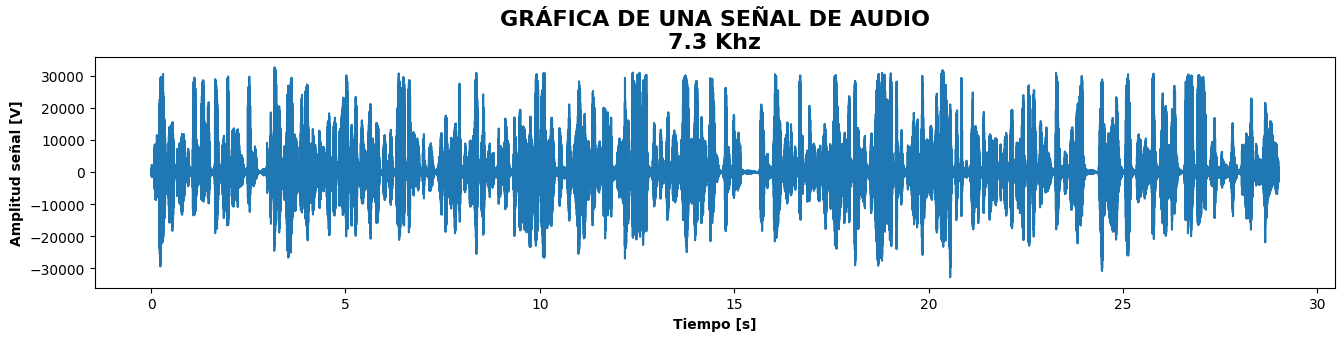

In [29]:
plt.figure(figsize=(16, 3))
plt.plot(t, y)

# Textos en la gráfica
plt.title(
    "Gráfica de una señal de Audio\n".upper() +
    f"{frecuencia_de_muestreo/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.ylabel("Amplitud señal [V]", fontweight="bold")
plt.xlabel("Tiempo [s]", fontweight="bold")
plt.show()

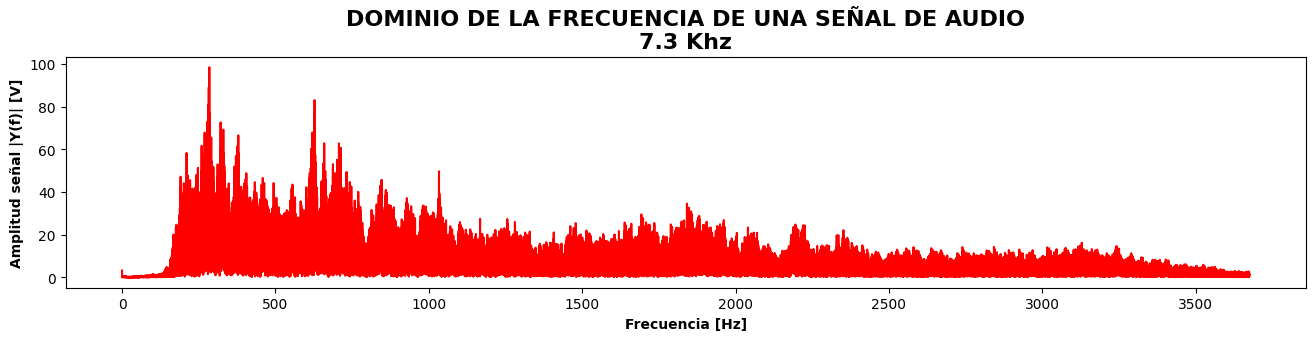

In [12]:
plt.figure(figsize=(16, 3))
plt.plot(f, abs(Y), 'r')

# Textos en la gráfica
plt.title(
    "Dominio de la frecuencia de una señal de Audio\n".upper() +
    f"{frecuencia_de_muestreo/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.ylabel("Amplitud señal |Y(f)| [V]", fontweight="bold")
plt.xlabel("Frecuencia [Hz]", fontweight="bold")
plt.show()

---
## Mas Recursos
- [Radio AM](https://es.wikipedia.org/wiki/Radio_AM) (Wikipedia)
- [Detector de envolvente](https://es.wikipedia.org/wiki/Detector_de_envolvente) (Wikipedia)
- [Detector de envolvente](https://oshwlab.com/giancarlobenavides/am_rx) (Esquemático)
- [AM Transmitter Specifications](https://broadcaststoreeurope.com/upload_dir/shop/Nautel-J1000-specs.pdf) (PDF)
